# Creating and Comparing Reference Curves Using MUFModels
The [Microwave Uncertainty Framework][MUF] (MUF) is a program developed at the National Institute of Standards and Technology (NIST) to deal with uncertainty propagation in high frequency electronics measurements. It has the ability to calculate uncertainties based on sensitivity analysis and Monte Carlo analysis. The package pyMez has many tools to deal independently with the MUF and data types associated with it. The majority of these are in the modules pyMez.Code.DataHandlers.MUFModels and pyMez.Code.Analysis.Sparameter. This notebook is an example of how to create a set of reference curves from the result of a MUF calculation. 
These results are typically organized as follows:
1. A file with the .meas extension that acts as a table of contents, it is a XML file that points to the files in directories that are normally directly below the .meas file with the naming scheme  `<file_name>_Support` . 
2. A nominal solution, located in the top directory `<file_name>_Support`. This is the solution where each parameter of the model describing the process is taken to be the mean. This is what is traditionally used as the "answer".
3. A directory for sensitivity results directly under the top directory `<file_name>_Support`. It follows the naming convention `<file_name>_Support\Covariance`. Inside of the directory there will be a file for every mechanism of uncertainty in the process. Each of these files is the result of assuming all but one of the mechanisms is the mean. One mechanism is assumed to be the mean + the standard uncertainty. The only way to associate the number of the file to the mechanism is via the .meas file.   
4. A directory for Monte Carlo results directly under the top directory `<file_name>_Support`.It follows the naming convention `<file_name>_Support\MonteCarlo`. Inside of the directory there will be a file for each Monte Carlo trial. Each of these files is the result randomly selecting each parameter of the model describing the process from a distribution set by the user. All values change for every trial, there is currently no way to extract the chosen parameter values from the saved files. 
5. A directory containing any needed presolution. 


[MUF]:https://www.nist.gov/services-resources/software/wafer-calibration-software

In [1]:
# First we import pyMez
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 4.103 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.692 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 11.887 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.019 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.51 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.092 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.411 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.027 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.029 s to import Code.Utils.Names
It took 19.77 s to import all of the active modules


In [2]:
# above there is a list of modules imported all of the modules are listed in the API_MODULES constant
for module in sorted(API_MODULES.keys()):
    print("{0} import is set to {1}".format(module,API_MODULES[module]))

Code.Analysis.Fitting import is set to False
Code.Analysis.Interpolation import is set to False
Code.Analysis.NISTUncertainty import is set to False
Code.Analysis.Reports import is set to False
Code.Analysis.SParameter import is set to False
Code.Analysis.Transformations import is set to False
Code.Analysis.Uncertainty import is set to False
Code.DataHandlers.AbstractDjangoModels import is set to False
Code.DataHandlers.GeneralModels import is set to True
Code.DataHandlers.GraphModels import is set to False
Code.DataHandlers.HTMLModels import is set to True
Code.DataHandlers.MUFModels import is set to False
Code.DataHandlers.NISTModels import is set to True
Code.DataHandlers.RadiCALModels import is set to False
Code.DataHandlers.StatistiCALModels import is set to False
Code.DataHandlers.TouchstoneModels import is set to True
Code.DataHandlers.Translations import is set to False
Code.DataHandlers.XMLModels import is set to True
Code.DataHandlers.ZipModels import is set to True
Code.Fron

In [3]:
# now we want to import pyMez.Code.DataHandlers.MUFModels, and pyMez.Code.Analysis.Sparameter
# Because pyMez.Code.Analysis.SParameter contains a lot of references to other code it takes a bit to import
from pyMez.Code.DataHandlers.MUFModels import *
from pyMez.Code.Analysis.SParameter import *

In [4]:
# to import the nominal file we use the SNP data type 
# in module pyMez.Code.DataHandlers.TouchstoneModels, because it is an s2p file
nominal_path=os.path.join(os.getcwd(),
                          "MUFModels_Example_Files/WR15_Line_5079_WR15_20180223_002_Support",
                          "WR15_Line_5079_WR15_20180223_002_0.s2p")
nominal=SNP(nominal_path)

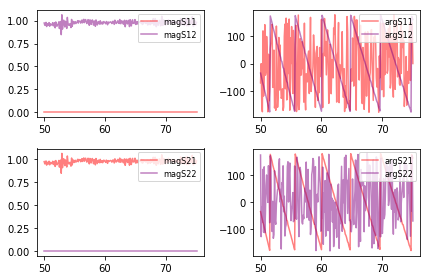

In [5]:
# to see a basic plot use the method .show()
nominal.show();

In [6]:
# if we want a curve with uncertanties we can use 
covariance_directory=os.path.join(os.getcwd(),"MUFModels_Example_Files\WR15_Line_5079_WR15_20180223_002_Support\Covariance")
sensitivity=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                               sensitivity_directory=covariance_directory)


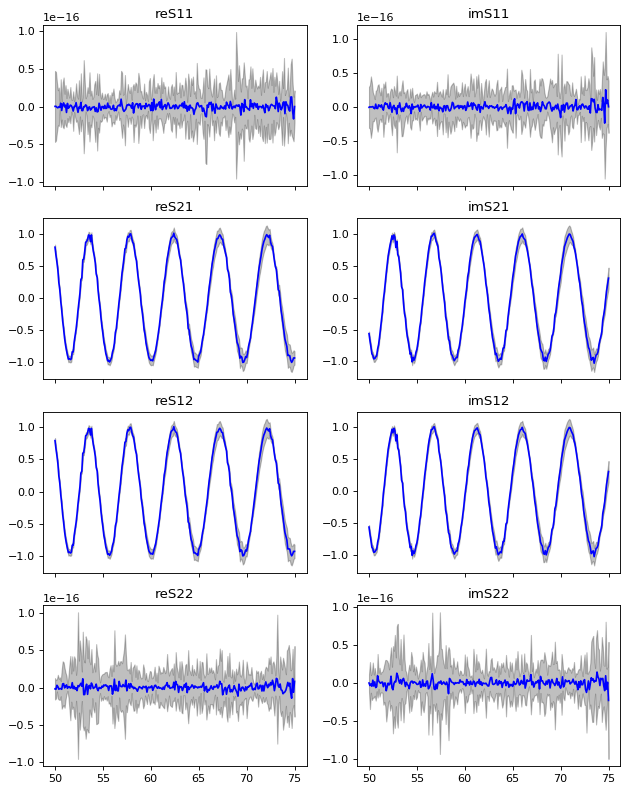

In [7]:
# now to plot the curve we use plot_reference_curve
# note we use this instead of a built in show because the class of the reference curve is a general AsciiDataTable
plot_reference_curve(sensitivity);

In [8]:
# to create a curve of the statistically biased mean and the montecarlo uncertainties, 
#this tends to be slow for large montecarlo sets 
montecarlo_directory=os.path.join(os.getcwd(),r"MUFModels_Example_Files\WR15_Line_5079_WR15_20180223_002_Support\MonteCarlo")
montecarlo=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory)

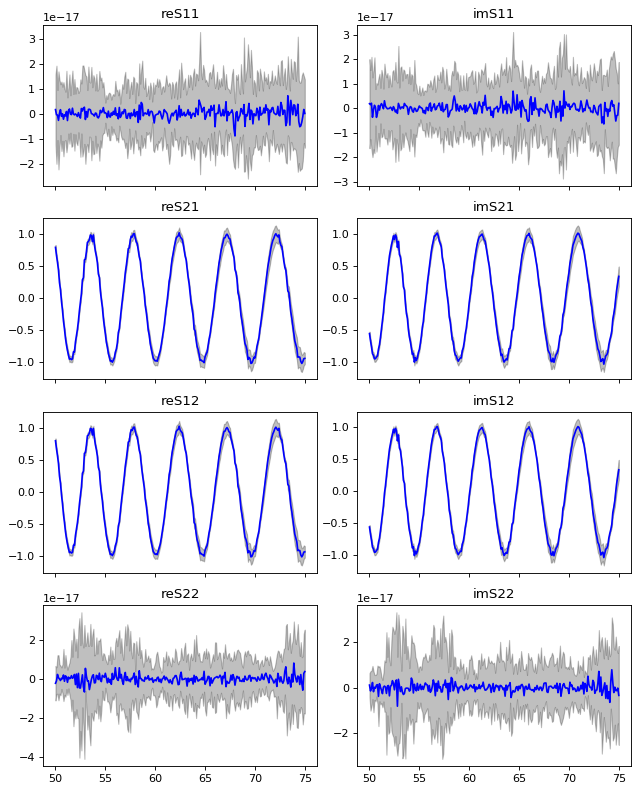

In [9]:
plot_reference_curve(montecarlo);

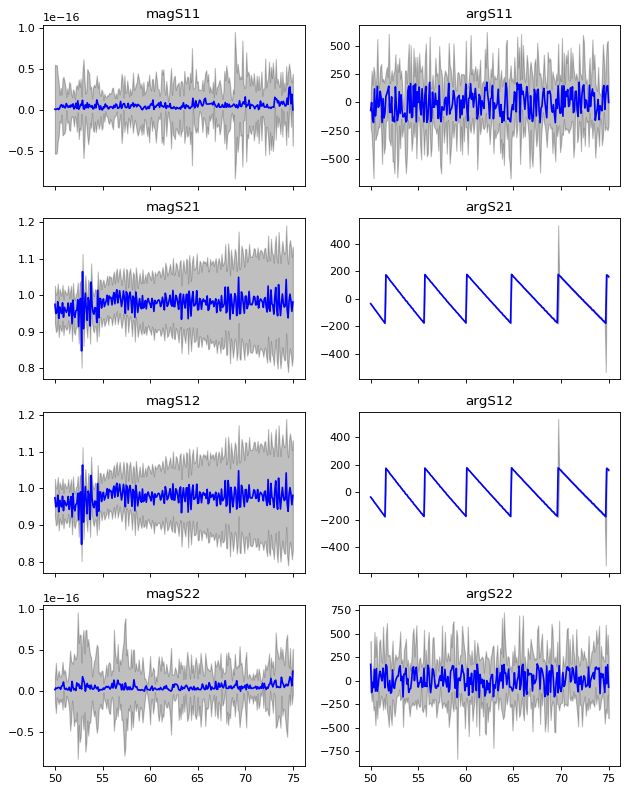

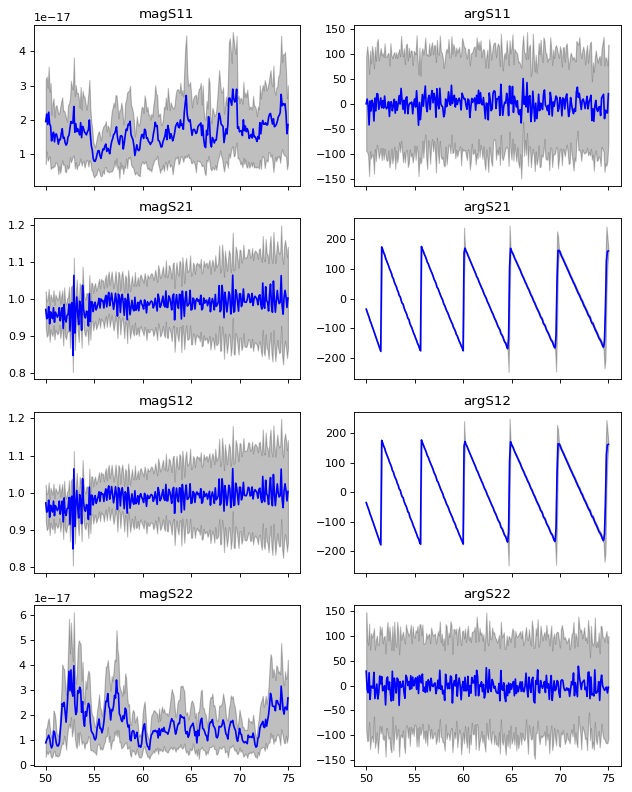

In [10]:
# each of these commands also has a format option that allows you to plot it in MA, DB, or RI
sensitivity_MA=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                               sensitivity_directory=covariance_directory,
                                                 format="MA")
montecarlo_MA=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,
                                                format="MA")
plot_reference_curve(sensitivity_MA);
plot_reference_curve(montecarlo_MA);

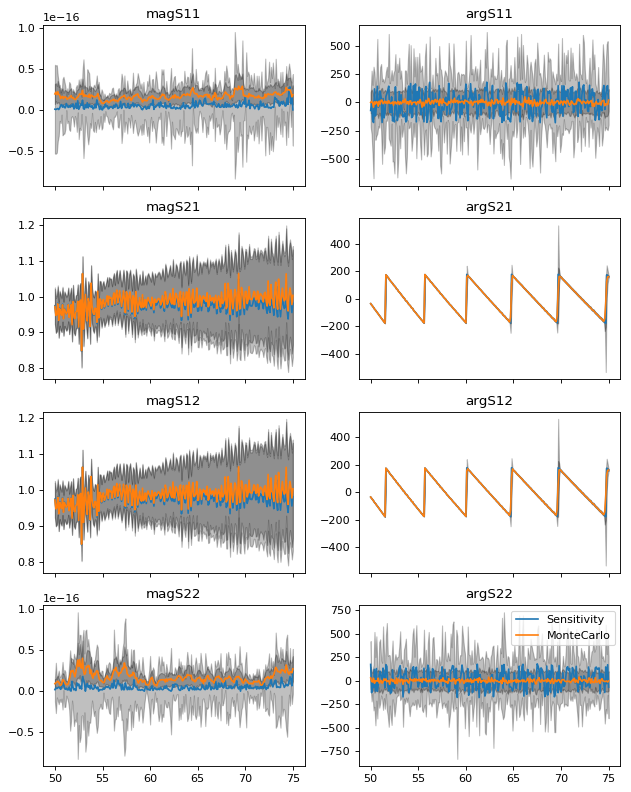

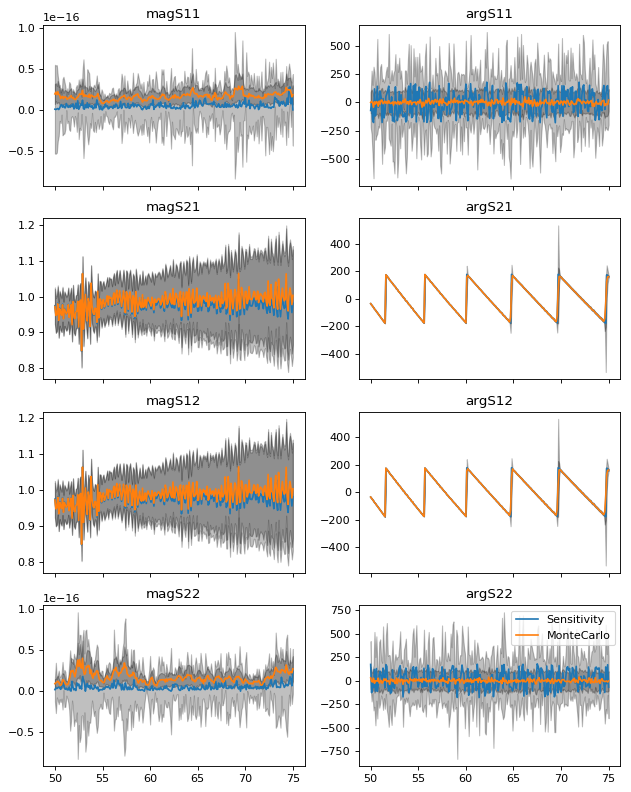

In [11]:
plot_reference_curve_comparison([sensitivity_MA,montecarlo_MA],display_legend=True,labels=["Sensitivity","MonteCarlo"])

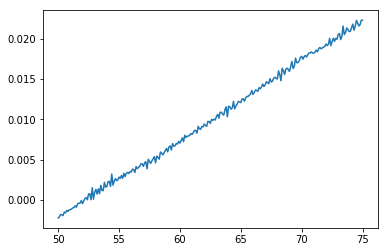

In [12]:
# now it is typicall to compare one of the curves say the mean amplitude of magS21 with the statistical bias one
plt.plot(montecarlo_MA["Frequency"],np.array(montecarlo_MA["magS21"])-np.array(sensitivity_MA["magS21"]))
plt.show();

In [13]:
# Each of the reference tables is a AsciiDataTable, effectively a csv type class. You can retrieve 
# a list of values by using the column name as an  index
montecarlo_MA.column_names

['Frequency',
 'magS11',
 'argS11',
 'magS21',
 'argS21',
 'magS12',
 'argS12',
 'magS22',
 'argS22',
 'umagS11',
 'uargS11',
 'umagS21',
 'uargS21',
 'umagS12',
 'uargS12',
 'umagS22',
 'uargS22']

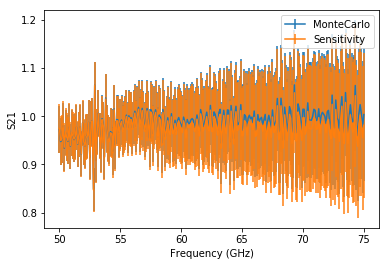

In [14]:
# to add error bars you can use plt.errorbar
plt.errorbar(x=montecarlo_MA["Frequency"],y=montecarlo_MA["magS21"],yerr=montecarlo_MA["umagS21"],label="MonteCarlo")
plt.errorbar(x=sensitivity_MA["Frequency"],y=sensitivity_MA["magS21"],yerr=sensitivity_MA["umagS21"],label="Sensitivity")
plt.ylabel("S21")
plt.xlabel("Frequency (GHz)")
plt.legend()
plt.show()

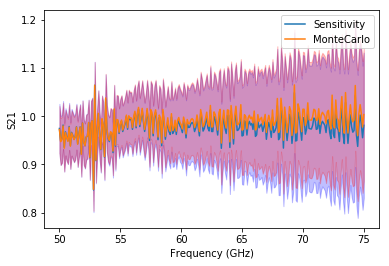

In [15]:
#fill_between is also useful
sensitivity_y=np.array( sensitivity_MA["magS21"])
sensitivity_err=np.array( sensitivity_MA["umagS21"])
plt.plot(sensitivity_MA["Frequency"],sensitivity_y, label="Sensitivity")
plt.fill_between(sensitivity_MA["Frequency"], sensitivity_y - sensitivity_err, sensitivity_y + sensitivity_err,
                        color='blue',
                        alpha=.25,
                        edgecolor='black')

montecarlo_y=np.array( montecarlo_MA["magS21"])
montecarlo_err=np.array( montecarlo_MA["umagS21"])
plt.plot(montecarlo_MA["Frequency"],montecarlo_y, label="MonteCarlo")
plt.fill_between(montecarlo_MA["Frequency"], montecarlo_y - montecarlo_err, montecarlo_y + montecarlo_err,
                        color='red',
                        alpha=.25,
                        edgecolor='black')
plt.ylabel("S21")
plt.xlabel("Frequency (GHz)")
plt.legend()
plt.show()


In [16]:
# to inspect the .meas (xml) file directly we can use
measurement_path=os.path.join(os.getcwd(),r"MUFModels_Example_Files\WR15_Line_5079_WR15_20180223_002.meas")
measurement=MUFMeasurement(measurement_path)

In [17]:
# to look at the mechanism names versus sensitivity names
measurement.get_name_parameter_dictionary()

{'WR15_Line_5079_WR15_20180223_002_1': 'WR15_Width',
 'WR15_Line_5079_WR15_20180223_002_2': 'WR15_Height',
 'WR15_Line_5079_WR15_20180223_002_3': 'Line5079_Length',
 'WR15_Line_5079_WR15_20180223_002_4': 'Line4909_Length'}

In [18]:
# to look at the pointers for the sensitivty
measurement.get_covariance_dictionary()

[{'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\Covariance\\WR15_Line_5079_WR15_20180223_002_1.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_1',
  'parameter_location': 'C:\\Share\\WR15_OML_MUF_20180313\\LRL_1\\Models\\Parameters\\WR15_Width.parameter'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\Covariance\\WR15_Line_5079_WR15_20180223_002_2.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_2',
  'parameter_location': 'C:\\Share\\WR15_OML_MUF_20180313\\LRL_1\\Models\\Parameters\\WR15_Height.parameter'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\Covariance\\WR15_Line_5079_WR15_20180223_002_3.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_3',
  'parameter_location': 'C:\\Share\\WR15_OML_MUF_20180313\\LRL_1\\Models\\Parameters\\Line5079_Length.parameter'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\

In [19]:
# to look at the pointers for the montecarlo
measurement.get_montecarlo_dictionary()

[{'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\MonteCarlo\\WR15_Line_5079_WR15_20180223_002_1.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_1'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\MonteCarlo\\WR15_Line_5079_WR15_20180223_002_2.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_2'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\MonteCarlo\\WR15_Line_5079_WR15_20180223_002_3.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_3'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\MonteCarlo\\WR15_Line_5079_WR15_20180223_002_4.s2p',
  'name': 'WR15_Line_5079_WR15_20180223_002_4'},
 {'location': 'C:\\Share\\WR15_VDI_MUF_20180316\\LRL_1\\DUTs\\WR15_Line_5079_WR15_20180223_002_Support\\MonteCarlo\\WR15_Line_5079_WR15_20180223_002_5.s2p',
  'name': 'WR15_Lin